# Metody Numeryczne

## Rozwiązywanie równań różniczkowych



### dr hab. inż. Jerzy Baranowski, Prof.AGH

## Isaac Newton

*Data aequatione quodcunque fluentes quantitiae involvente fluxiones invenire et vice versa* 24 października 1676

Rozwiązywanie równań różniczkowych jest rzeczą pożyteczną

## Równania różniczkowe
Równanie różniczkowe
$$ 
\dot{x}=f(t,x)
$$
Rozwiązanie równania różniczkowego $x(t)$ to funkcja, która dla każdego $t$ spełnia
$$ 
\dot{x(t)}=f(t,x(t))
$$

## Problem Cauchy'ego

Wyznaczyć rozwiązanie równania dla $t\geq t_0$ przy czym
$$
x(t_0)=x_0
$$

Inaczej problem początkowy.

Wymiennie będziemy mówić o rozwiązywaniu i całkowaniu równań różniczkowych

## Metoda Eulera

**Istitutiones Calculi Integralis I** 1768

$$ 
\dot{x}=f(t,x),\quad x(t_0)=x_0, \quad x(T)=?
$$

W zależności od tego ile razy $f$ jest różniczkowalne możemy rozwinąć $x(t)$ w szereg Taylora. 
W szczególności
$$
x(t_0+\Delta t)=x_0+\Delta t\cdot f(t_0,x_0)+ \frac{\Delta t^2}{2}(f_t+f_x f)(t_0,x_0)+...
$$



## Metoda Eulera cd..
Podzielmy przedział $T$ na elementy (tzw. kroki)
$$
t_0,\ t_1,\ \ldots,\ t_{n-1},\ t_n
$$
i rozwiązanie w każdym podprzedziale zastępujemy pierwszym wyrazem szeregu Taylora
$$
\begin{aligned}
x_1-x_0={}&(t_1-t_0)f(t_0,x_0)\\
x_2-x_1={}&(t_2-t_1)f(t_1,x_1)\\
{}&\vdots\\
x_n-x_{n-1}={}&(t_n-t_{n-1})f(t_{n-1},x_{n-1})
\end{aligned}
$$
Oznaczając $h_i=t_{i+1}-t_i$ mamy rekurencję
$$
x_{k+1}=x_k + h_k f(t_k,x_k)
$$


## Metoda Eulera cd..
Niech $f (t, x)$ będzie ciągła, $|f|\leq A$  oraz $f$ spełnia warunek Lipshitza na zbiorze
$$
D=\left\{(t,x)\colon t_0 \leq t\leq T, |x−x0|\leq b \right\}
$$
Jeżeli $X − x_0 \leq b/A$ , mamy:

1. Dla $|\max_i h_i|\rightarrow0$ rozwiązanie rekurencuyjne zmierza do ciągłej funckji $ \phi(t)$.
2. $ \phi(t)$ jest ciągłym różniczkowalnym rozwiązaniem równania różniczkowego dla $t_0 \leq t\leq T$. 
3. Nie iestnieją inne rozwiązania równania na przedziale $t_0 \leq t\leq T$.

## Metoda Eulera cd..
Jeżeli w otoczeniu rozwiązania 
$$
f|\leq A,\quad \left|\frac{\partial f}{\partial x}\right|\leq L,\quad \left|\frac{\partial f}{\partial t}\right|\leq M
$$
Zachodzi oszacowanie
$$
\mathrm{error}(t)\leq\frac{M+AL}{L}\left(\mathrm{e}^{L(t-t_0)}-1\right)\cdot|h|
$$
przy założeniu dostatecznie małego $|h|$

## Konsekwencje
1. Błąd z kroku na krok jest rzędu $h$ (bo zgadza się szereg Taylora)
2. Metoda jest zbieżna do rozwiązania.
3. Błąd globalny (na całym przedziale) jest zależny od długości kroku i długości przedziału

Własności te przenoszą się też na bardziej skomplikowane metody.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
test=lambda t,x: -x

def euler(f, x0,t0,tk,n):
    
    h=(tk-t0)/n
    x=np.empty((x0.size,n))
    print(x0.shape)
    x[:,0]=x0[:,0]
    for i in range(0,n-1):
        x[:,i+1]=x[:,i]+h*f(i*h,x[:,i])
    t=np.linspace(t0,tk,n)
    return (t,x.transpose())

(t,x)=euler(test,np.array([[1],[-1]]),0,10,1000)


(2, 1)


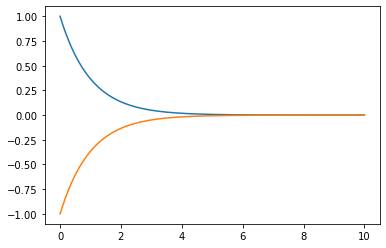

In [21]:
plt.plot(t,x)
plt.show()

In [4]:
x0.size


2